# Symbolic math

[SymPy](https://www.sympy.org/en/index.html) is a Python library for symbolic mathematics. It aims to become a full-featured computer algebra system (CAS) while keeping the code as simple as possible in order to be comprehensible and easily extensible. SymPy is written entirely in Python. It is slightly outside of the scope of what I would normally recommend for Human Movement Sciences (that's why it's an appendix), but I do feel that it deserves a honorable mention and based on the example below I think you can actually use it to solve HMS related problems.

## Throwing a ball

In this assignment we'll use a simple application of sympy. We will use it to determine how far we can throw a ball given an initial angle and velocity. We will also solve the maximum height that the ball reaches during our throw.

```{figure} https://upload.wikimedia.org/wikipedia/commons/0/00/Ferde_hajitas3.svg
---
height: 250px
name: projectile_motion
---
An example of projectile motion
```

In [1]:
from sympy import *
from numpy import deg2rad
import matplotlib.pyplot as plt

Symbolic Python allows us to solve math problems in Python. We can write down an equation like we would in a notebook and instead of solving it by hand we can ask Python to solve it for us!

The ball's horizontal and vertical displacement can be described as:

$$
  x(t) = v_0 t cos(\phi)
$$
$$
  y(t) = v_0 t sin(\phi) - \frac{1}{2}gt^2
$$

First we have to make some symbols to do math with:


### Making a variable

You can make variables using the `symbols` function. It accepts a string with the variable names you want and it let's you assign them to a variable in Python. We need a variable for v0, t, phi, and g:

In [2]:
v0, t, φ, g = symbols("v0 t φ g")
v0

v0

In [3]:
type(v0)

sympy.core.symbol.Symbol

### Making an equation

Now we can make our equation, let's start with x(t):

In [4]:
x = v0 * t * cos(φ)
x

t*v0*cos(φ)

Cool! Sympy makes your equation look fancy! If it looks different for you and you want the best pretty printing for your environment use the init_printing() function. Note that the equality sign here is not mathematical equality, we simply assigned the equation to the variable x.

**Your turn, do the same thing for y(t), the release height of the ball was 2m so add that too:**

In [5]:
y = v0 * t * sin(φ) - (1/2) * g * t**2 + 2
y

-0.5*g*t**2 + t*v0*sin(φ) + 2

### Solving an equation

The ball is thrown at 30 m/s at an optimal angle of 45 degrees. How long does it take before the ball hits the ground? To answer this question we must first fill in the formula, and then solve the remaining equation. You can substitute a symbol with a numerical value (or another symbol) with the `.subs` method. I'll do the first one:

In [6]:
y = y.subs(v0, 30)
y

-0.5*g*t**2 + 30*t*sin(φ) + 2

**Now you have to subsitute φ (45 degrees) and g (9.81 m/s/s):**

In [7]:
y = y.subs(φ, deg2rad(45))
y = y.subs(g, 9.81)
y

-4.905*t**2 + 21.2132034355964*t + 2

Now solve for when y(t) is equal to 0. Quite predictably, we do this with the function `solve`:

In [8]:
solve(Eq(y, 0))

[-0.0923105885630672, 4.41712270591198]

Now we know the ball hits the ground after about 4.42 seconds. This equation has two answers (because it is a parabola), but we're not really interested in what would happen if we threw the ball backwards along the same path (though this would probably happen if I tried to throw it). With this information we can calculate how far the ball traveled in the x-direction by substituting everything in x.

**Substitute v0, φ, and t in the function x(t):**

In [9]:
x = x.subs(v0, 30)
x = x.subs(φ, deg2rad(45))
x = x.subs(t, 4.42)
x

93.7623591853362

Almost 94 meters, that is pretty impressive! However, we did not account for air drag so it is probably a little optimistic. 

### Derivatives

To calculate how high the ball traveled we must find the max of y. Remember that you can find the maximum of a function by looking at its derivative and determining when it is equal to zero. Sympy can also differentiate a formula for you with `diff`, diff accepts the formula and the symbol you want to differentiate for (in this case t).

**Differentate y(t) and assign the result to the variable dy:**

In [10]:
dy = diff(y, t)
dy

21.2132034355964 - 9.81*t

**Now solve for 0:**

In [11]:
solve(Eq(dy, 0))

[2.16240605867445]

Now you know that the peak is at 2.16 seconds. All you have to do is substitute t with 2.16 in your original function.

**Make the substitution in y(t):**

In [12]:
y.subs(t, 2.16)

24.9357514208883

There is your answer! 25m high is not too shabby 😎. 

### Quick plots

To verify your answer, Sympy allows you to make some quick plots:

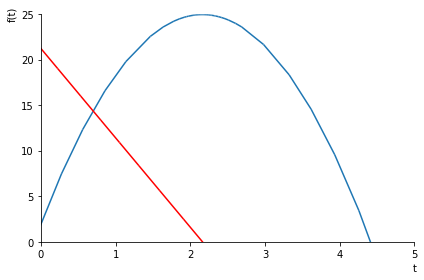

In [13]:
y = v0 * t * sin(φ) - (1/2) * g * t**2 + 2
y = y.subs(v0, 30)
y = y.subs(φ, deg2rad(45))
y = y.subs(g, 9.81)

dy = diff(y, t)

p1 = plot(y, xlim=(0,5), ylim=(0, 25), show=False)
p2 = plot(dy, line_color="r", show=False)
p1.extend(p2)
p1.show()